# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exam 2</font>

**LAST NAME, FIRST NAME**

**R00000000**

___

### Purpose : 
Demonstrate ability to apply groundwater hydrology principles to aquifers

### Additional Instructions

1. The test is intended to be completed by extracting the problem statements and inserting worked answers, including computations into a document, saving that document as a PDF file, and uploading the completed exam to Blackboard.  
2. Show your work; handwritten is OK, but must be neat, organized, and legible (no brain vomit)
3. Cite reference sources used to support your work

**CE 4363** Complete problems 1-4<br>
**CE 5363** Complete problems 1-6<br>
**Problem 7 is extra credit for either course**<br>

<hr>
<hr>

## Question 1 (10 pts.)

Distinguish between the capabilities of ModelMUSE and MODFLOW.

<hr>
<hr>

## Question 2 (30 pts.)

A confined aquifer system is conceptualized as pictured below.

![](aquiferSystem.png)

Water enters the system in the recharge area and exits as a spring.

Determine:
1. The piezometric head in the well located at $M$ (express the head in terms of the other variables indicated on the sketch)
2. Specify the conditions for the well to become a flowing (artesian) well (water flows from the well without pumping).

<hr>
<hr>

## Question 3 (30 pts.)

A 4-cell aquifer model is conceptualized in the figure below.

![](aquiferSystem1D.png)

The width of the aquifer strip is 3.0 km; the length of each cell is 5 km.  The recharge rates for the aquifer strip is $400~\frac{mm}{yr}$, $300~\frac{mm}{yr}$,$300~\frac{mm}{yr}$, $200~\frac{mm}{yr}$ in Cells 1,2,3, and 4, respectively.  The water level in the river is maintained at a constant elevation of $160~m$ above the horizontal impervious bottom.  The hydraulic conductivity in Cells 1 and 2 is $3~\frac{m}{d}$, while in Cells 3 and 4 it is $6~\frac{m}{d}$.

Using this conceptual model, determine:

1. Write the steady-flow balance equations to estimate average water levels in the four cells.
2. Solve these equations to determine the average elevations in the 4 cells without pumping.
3. Solve these equations when pumping takes place in Cells 2 and 3 at rates of $4\times10^{6}~\frac{m^3}{yr}$ and $7\times10^{6}~\frac{m^3}{yr}$, respectively.

### Reference(s)

1. [Bear (1979). *Hydraulics of Groundwater* McGraw-Hill (Chapter 10: Modeling of Aquifer Systems)](ce-4363-webroot/3-Readings/BearChapter10.pdf) (Eq. 10-9) is useful.

<hr>
<hr>

**1. Write the steady-flow balance equations to estimate average water levels in the four cells.**

A generic cell balance equation (from notes) is:

$$ 
0 = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{i−1,j} − h_{i,j}}{\Delta x} - \frac{1}{\Delta x} K_x \bar h \frac{h_{i,j} − h_{i+1,j}}{\Delta x} ]\Delta y + \frac{R_{i,j}}{\Delta x \Delta y} - \frac{Q_{i,j}}{\Delta x \Delta y}
$$

where $\Delta y$ is the width of the strip (3,000 meters), and $\Delta x$ is the length of each cell (5,000) meters.

Specific for each cell is:

Cell 1:

$$ 
0 = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{0} − h_{1}}{\Delta x} - \frac{1}{\Delta x} K_x \bar h \frac{h_{1} − h_{2}}{\Delta x} ]\Delta y + \frac{R_{1}}{\Delta x \Delta y} - \frac{Q_{1}}{\Delta x \Delta y}
$$

where $h_{0}$ is the head in the river.

Cell 2:

$$ 
0 = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{1} − h_{2}}{\Delta x} - \frac{1}{\Delta x} K_x \bar h \frac{h_{2} − h_{3}}{\Delta x} ]\Delta y + \frac{R_{2}}{\Delta x \Delta y} - \frac{Q_{2}}{\Delta x \Delta y}
$$

Cell 3:

$$ 
0 = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{2} − h_{3}}{\Delta x} - \frac{1}{\Delta x} K_x \bar h \frac{h_{3} − h_{4}}{\Delta x} ]\Delta y + \frac{R_{3}}{\Delta x \Delta y} - \frac{Q_{3}}{\Delta x \Delta y}
$$

Cell 4:

$$ 
0 = [ \frac{1}{\Delta x} K_x \bar h \frac{h_{3} − h_{4}}{\Delta x}]\Delta y + \frac{R_{4}}{\Delta x \Delta y} - \frac{Q_{4}}{\Delta x \Delta y}
$$

**2. Solve these equations to determine the average elevations in the 4 cells without pumping.**

Using the spatial variation scheme in the notes we have

$$
A_{i} = \frac{\Delta y}{2∆x^2} (K_{x,(i−1)} h_{i−1} + K_{x,(i)} h_{i−1})\\
B_{i} = \frac{\Delta y}{2∆x^2} (K_{x,(i)} h_{i} + K_{x,(i+1)} h_{i+1})\\
$$

Next explicitly write the cell equation for $h_{i,j}$, recall that the system
is non-linear so the A, B coefficients are themselves functions of the current cell
values

$$
h_{i,j} = \frac{A_{i} h_{i−1} + B_{i} h_{i+1} + \frac{Q_{i}}{\Delta x \Delta y} - \frac{R_{i}}{\Delta x \Delta y}}{A_{i} + B_{i}  } 
$$

Rather than code this variant, its a bit easier to reuse code already built for 2D but use only 3 rows, and 6 columns.  The interior row and columns are the aquifer, the rest is boundary conditions.

Results below use the 2D unconfined with pumping from class notes.

Input file

```
5000
3000
100
3
6
1e-9
20000
0 2500 7500 12500 17500 20000
0 1500 3000 
0 0 0 0 0 0
0 0 0 0 0 0 
1 1 1 
0 0 0 
160 30 30 30 30 30 
160 30 30 30 30 30
160 30 30 30 30 30
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
0.000 0.000 0.000 0.000 0.000 0.000 
0.000 -1.64e4 -1.23e4 -1.23e4 -8.2e3 0.000
0.000 0.000 0.000 0.000 0.000 0.000
```

In [123]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("4cell.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
recharge = [] # empty list
for irow in range(nrows):
        recharge.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (recharge[irow][jcol]-pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
#writearray(head)
#print("----")
#writearray(headold)
#print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    print("----")
##    writearray(headold)
##    print("--------")
## Transmissivity Arrays
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            amat[irow][jcol] = ((head[irow-1][jcol  ] * hydcondx[irow-1][jcol  ]+ head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ])) /(2.0*deltax**2)
            bmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]+ head[irow+1][jcol  ] * hydcondx[irow+1][jcol  ])) /(2.0*deltax**2)
            cmat[irow][jcol] = ((head[irow  ][jcol-1] * hydcondy[irow  ][jcol-1]+ head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ])) /(2.0*deltay**2)
            dmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]+ head[irow  ][jcol+1] * hydcondy[irow  ][jcol+1])) /(2.0*deltay**2)

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head[0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head[nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head[irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head[irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right

# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ] + bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,5))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 232
End Calculations
Iterations    =  232
Closure Error =  0.0
Minimum Head 160.0
Head Map
----
0 [160.    212.896 241.814 252.809 256.039 256.039]
1 [160.    212.896 241.814 252.809 256.039 256.039]
2 [160.    212.896 241.814 252.809 256.039 256.039]
----


Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

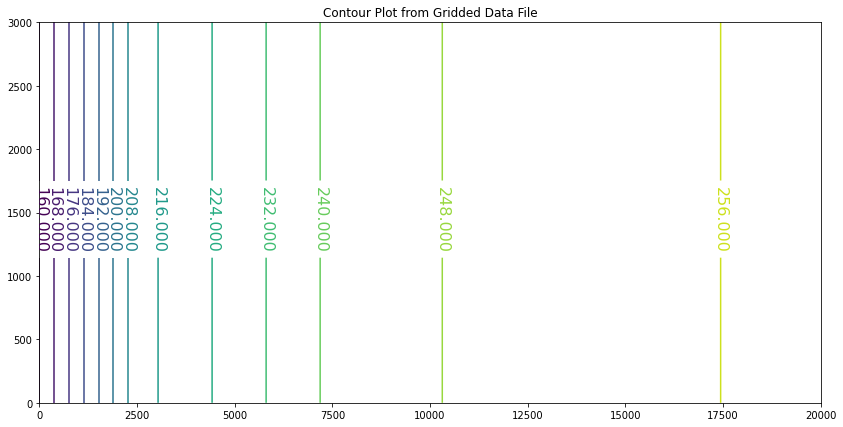

In [124]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(0, 20000, 200)
lat = numpy.linspace(0, 3000, 30)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='linear')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

**3. Solve these equations when pumping takes place in Cells 2 and 3 at rates of $4\times10^{6}~\frac{m^3}{yr}$ and $7\times10^{6}~\frac{m^3}{yr}$, respectively.**

Simply modify the pumping-recharge array to reflect these pumping rates, input file is:

```
5000
3000
100
3
6
1e-9
20000
0 2500 7500 12500 17500 20000
0 1500 3000 
0 0 0 0 0 0
0 0 0 0 0 0 
1 1 1 
0 0 0 
160 30 30 30 30 30 
160 30 30 30 30 30
160 30 30 30 30 30
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
3. 3. 3. 6. 6. 6.
0.000 0.000 0.000 0.000 0.000 0.000 
0.000 -1.6e4 -1.4e3 6.8e3 -8.2e3 0.000
0.000 0.000 0.000 0.000 0.000 0.000
```

In [121]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("4cell-pumps.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
#writearray(head)
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondx)
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
#writearray(hydcondy)
recharge = [] # empty list
for irow in range(nrows):
        recharge.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
pumping = [] # empty list
for irow in range(nrows):
        pumping.append([float(n) for n in localfile.readline().strip().split()])
#writearray(pumping)
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
qrat = [[0 for j in range(ncols)] for i in range(nrows)]
## Net Pumping Array
for irow in range(nrows):
    for jcol in range(ncols):
        qrat[irow][jcol] = (recharge[irow][jcol]-pumping[irow][jcol]) /(deltax*deltay)
## Headold array
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force a new matrix
headold = update(head,headold) # update
#writearray(head)
#print("----")
#writearray(headold)
#print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    print("----")
##    writearray(headold)
##    print("--------")
## Transmissivity Arrays
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            amat[irow][jcol] = ((head[irow-1][jcol  ] * hydcondx[irow-1][jcol  ]+ head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ])) /(2.0*deltax**2)
            bmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondx[irow  ][jcol  ]+ head[irow+1][jcol  ] * hydcondx[irow+1][jcol  ])) /(2.0*deltax**2)
            cmat[irow][jcol] = ((head[irow  ][jcol-1] * hydcondy[irow  ][jcol-1]+ head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ])) /(2.0*deltay**2)
            dmat[irow][jcol] = ((head[irow  ][jcol  ] * hydcondy[irow  ][jcol  ]+ head[irow  ][jcol+1] * hydcondy[irow  ][jcol+1])) /(2.0*deltay**2)

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head[0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head[nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head[irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head[irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right

# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=(qrat[irow][jcol] 
                              +amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ] + bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
##    print(percentdiff)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,5))
# special messaging to report min head to adjust pump rates
import numpy
b = numpy.array(head)
print("Minimum Head",round(b.min(),3))
#
print("Head Map")
print("----")
writearray(head)
##writearray(headold)
print("----")

Exit iterations in velocity potential because tolerance met 
Iterations = 251
End Calculations
Iterations    =  251
Closure Error =  0.0
Minimum Head 86.804
Head Map
----
0 [160.    145.661 121.005  98.624  86.804  86.804]
1 [160.    145.661 121.005  98.623  86.804  86.804]
2 [160.    145.661 121.005  98.624  86.804  86.804]
----


Text(0.5, 1.0, 'Contour Plot from Gridded Data File')

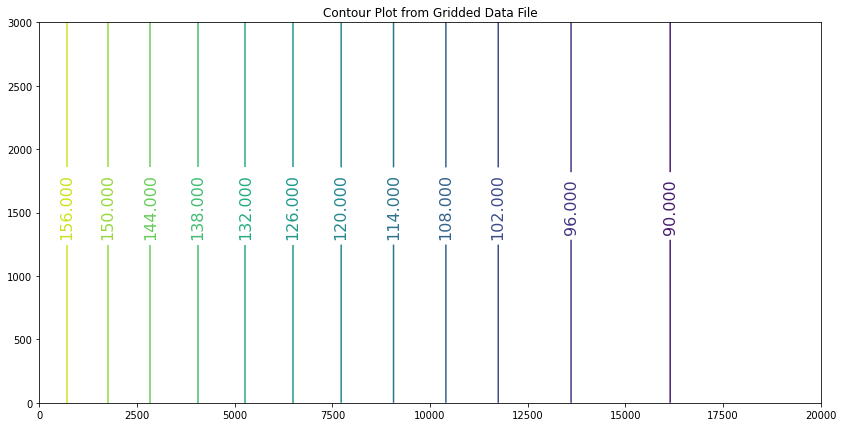

In [122]:
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
# build XYZ structure from head map
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(0, 20000, 200)
lat = numpy.linspace(0, 3000, 30)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='linear')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(14, 7)
CS = ax.contour(X, Y, Z, levels = 12)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot from Gridded Data File')

## Question 4 (30 pts.)

The figure is a plan view of a confined aquifer showing two contaminated zones, 1 and 2. The aquifer has a saturated thickness of 80 ft, hydraulic conductivity of 42 ft/d, and the regional hydraulic gradient is 0.0075 from right to left as shown. A pumping well with a flow rate of 170 gpm is planned to run continuously at the location shown, and form a stable (equilibrium) capture zone. You may assume that the 2500 ft distance from the well to zone 1 is long enough that the capture zone has reached its maximum width.

![](plumeria.png)

Determine:

1. If contamination from zone 1 find its way to the pumping well? Provide support for your answer with a capture zone analysis or contaminant simulation model.
2. If contamination from zone 2 find its way to the pumping well? Provide support for your answer with a capture zone analysis or contaminant simulation model.

### References

1. [Javandel,I., and Tsang,C-F. (1986) "Capture Zone Type Curves: A Tool for Aquifer Cleanup" *Groundwater* Vol. 24 No. 5 pp. 616-625](http://54.243.252.9/ce-4363-webroot/3-Readings/Capture.PDF)

<hr>
<hr>

## CE 5363 Question 5 (30 pts.)

A saturated aquifer sample core of diameter 2.54 cm and length of 6 cm weighs 63 grams.  After drying the sample weighs 53 grams.  The core sample was placed into an permeameter and exposed to a unit hydraulic gradient.  The measured flowrate was 25.4 milliliters/second.

The water levels in three wells in the same aquifer were measured in meters above MSL.  The levels were: Well MW-1: 83.1 m; Well MW-2: 84.6 m; Well MW-3: 83.9 m.  

Well MW-2 is located 1km due north of Well MW-1, and Well MW-3 is located 700 meters Northeast of Well MW-1.

Determine:
1. Estimate the porosity of the aquifer.
2. Estimate the hydraulic conductivity of the aquifer.
3. Sketch the relative positions of the three wells.  Use MW-1 as the origin of the local (your sketch) coordinate system, and North is to the top of your sketch.
4. Determine the magniture and direction of the hydraulic gradient in the aquifer monitored by the three wells.  Indicate the hydraulic gradient on your sketch (direction and magnitude)
5. Estimate the concentration of a conservative constituient (contaminant) at a receptor 4 km away from MW-1 on a flowline that passes through MW-1 using the Ogata-Banks  model, assuming MW-1 is at the source location, and the source concentration is 1000 mg/l. Use one-tenth of the path length as the aquifer dispersivity (recall dispersion coefficient is the product of dispersivity and average linear velocity).  Calculate the receptor concentration from 0 days after release to 1000 days after release in 10 day increments, and make a concentration history plot for the receptor location.
6. An estimate of the time from release until the concentration at the receptor is 500 mg/L.

### References

1. [Ogata, A., & Banks, R. B. (1961). A solution of the differential equation of longitudinal dispersion in porous media: fluid movement in earth materials. US Government Printing Office. (link is to an on-line calculator)](https://www.groundwatersoftware.com/calculator_5_ogata_banks.htm)

2. Fetter Eq. 10-8 p. 412 

<hr>
<hr>


## CE 5363 Question 6 (15 pts.)

The three figures below depict streamline patterns for flow near a circular region.  

![](streamPattern.png)

Explain the differences in the patterns in terms of the hydraulic conductivity within the circular region and the surrounding region.

<hr>
<hr>

## CE 4363/5363 Question 7 (Extra Credit) (30 pts.)

Consider a single “cell” model. The cell contains a liquid with known initial concentration of a pollutant. The cell is flushed at a constant flow rate with a liquid with zero concentration of the pollutant.  

![](singleCell.png)

The cell is completely back-mixed, so any mass entering is uniformily distributed within the cell.  The volume of the cell is $V$, the discharge entering and leaving is $Q$

Determine:

1. An expression for the mass of **pollutant** in the cell at any time.
2. A difference expression for the change in mass in the cell over a discrete time interval (∆t).
3. The mass flow of pollutant into the cell (yes, I know its zero, but play along).
4. The mass flow of pollutant leaving the cell.
5. Combine 2,3, and 4 into a single balance expression (i.e. $\frac{\Delta C}{\Delta t} = \dots~$).

<hr>
<hr>

<!-- ## CE 5363 Question 15 (40 pts.)

Given the four-cell conceptualization of an aquifer with the properties listed below 

![](4cellmodel.png)

Determine:

1. Write the steady-flow balance equations for average water levels in the four cells
2. Solve these equations to determine if the aquifer is a net supplier of water to the river or if the river is a supplier of water to the aquifer.
3. Write the steady-state balance equations for average concentration of a conservative tracer in the four cells.
4. If the river concentration of this tracer is 1,000 mg/L, calculate the steady-state concentrations in the four cells.

### Reference(s)

1. [Bear (1979). *Hydraulics of Groundwater* McGraw-Hill (Chapter 10: Modeling of Aquifer Systems)](ce-4363-webroot/3-Readings/BearChapter10.pdf) (Eq. 10-9) is useful, also (Eq. 10-11).  

<hr>
<hr>

-->

<!-- ## Question 3 (3 pts.)

Distinguish between calibration and validation for a numerical groundwater computer model.

<hr>
<hr>
-->

<!-- ## Question 2 (5 pts.)

List four potential sources of groundwater contamination.

<hr>
<hr>
-->

<!-- ## Question 9 (15 pts.)

A one-dimensional soil column experiment was performed to study the effects of dispersion on solutes in a soil sample. The soil column was 0.30 m long, and the actual flow velocity was set at 6.0 cm/hr. The dispersivity of the solute was found to be 4.5 cm. Molecular diffusion was neglected. A conservative tracer, which was initially absent in the soil column, was introduced to the influent end of the column at time zero at a concentration of 50 mg/L. 

Determine:
1. The concentration of the tracer in the column effluent in mg/L at time of 4.5 hr after injection began.

<hr>
<hr>
-->

<!-- ## CE 5363 Question 12 (10 pts.)

In a plan view of a contaminant plume you notice that the leading edge of the chloride has moved approximately 1500 meters, while cadmium has moved only about 400 meters.  Both constituients were released at the same time; the aquifer porosity is 0.30 and the solids density is 2.22 g/cc.

![](plumerb.png)

Determine:
1. The distribution coefficient for cadmium

### References

1. Fetter Eq. 10-15 p. 418

<hr>
<hr>
-->

<!-- ## Question 4 (5 pts.)

Does the presence of a man-made chemical in groundwater make it unusable? Explain your answer in terms of regulatory or technical issues.

<hr>
<hr>
-->

<!-- 
## Question 4 (5 pts.)

Explain how geophysical application of electrical resistivity can be used to distinguish between clay and sand, and between dry and saturated clay.

<hr>
<hr>
-->

<!-- ## Question 6 (5 pts.)

Explain the concept of safe yield for an aquifer. Why is it hard to define? Why must we try to define it?

<hr>
<hr> -->